In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [137]:
# Load Dataset
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/car_price.csv"
df = pd.read_csv(url)

current_year = datetime.now().year
df['Age'] = current_year - df['Year']

In [138]:
# Encode all non-numerical data
encoder = LabelEncoder()
df['Encoded Brand'] = encoder.fit_transform(df['Brand'])
df['Encoded Body'] = encoder.fit_transform(df['Body'])
df['Encoded Engine Type'] = encoder.fit_transform(df['Engine Type'])
df['Encoded Registration'] = encoder.fit_transform(df['Registration'])
df['Encoded Model'] = encoder.fit_transform(df['Model'])

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Encoded Brand,Encoded Body,Encoded Engine Type,Encoded Registration,Encoded Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,32,1,3,3,1,18
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,24,2,5,0,1,266
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,20,2,3,1,1,237
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,16,0,0,3,1,224
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,12,5,0,3,1,227


In [139]:
# Display the Univariate Data Characteristics 
df.describe()

,Price,Mileage,EngineV,Year,Age,Encoded Brand,Encoded Body,Encoded Engine Type,Encoded Registration,Encoded Model
count,4173.000000,4345.000000,4195.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058,16.449942,3.156272,2.550288,1.288377,0.908400,165.751669
std,25584.242620,105.705797,5.066437,6.719097,6.719097,2.078174,1.655482,1.361100,0.288493,88.443642
min,600.000000,0.000000,0.600000,1969.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6999.000000,86.000000,1.800000,2003.000000,11.000000,1.000000,1.000000,0.000000,1.000000,105.000000
50%,11500.000000,155.000000,2.200000,2008.000000,15.000000,3.000000,3.000000,1.000000,1.000000,164.000000
75%,21700.000000,230.000000,3.000000,2012.000000,20.000000,5.000000,3.000000,3.000000,1.000000,227.000000
max,300000.000000,980.000000,99.990000,2016.000000,54.000000,6.000000,5.000000,3.000000,1.000000,311.000000


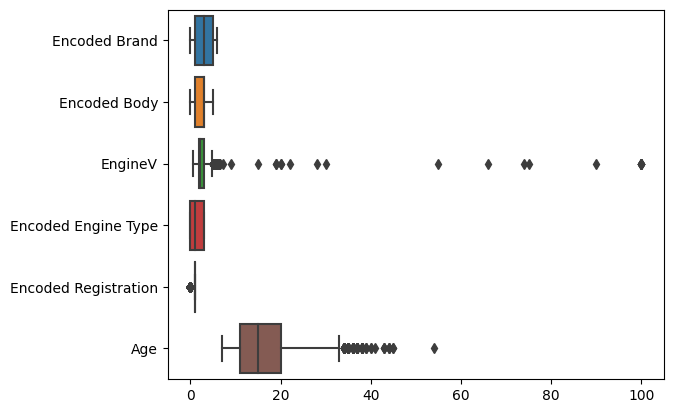

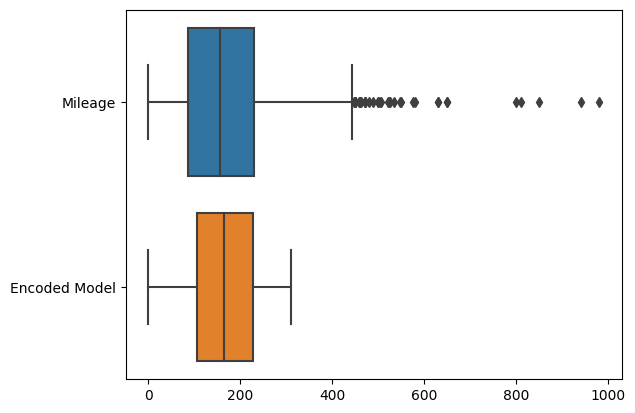

In [140]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=df[['Encoded Brand', 'Encoded Body', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']], orient='h')
plt.show()

sns.boxplot(data=df[['Mileage', 'Encoded Model']], orient = 'h')
plt.show()

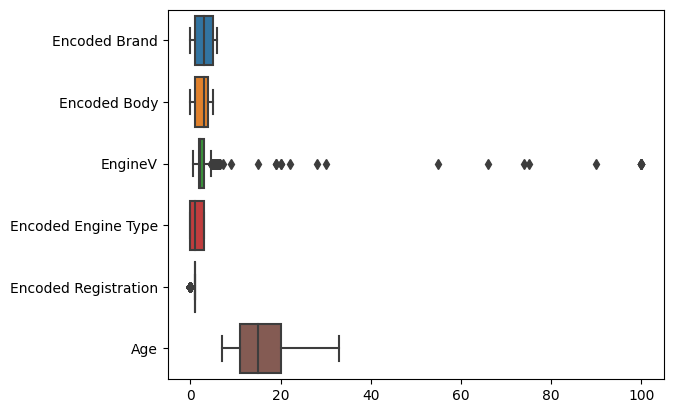

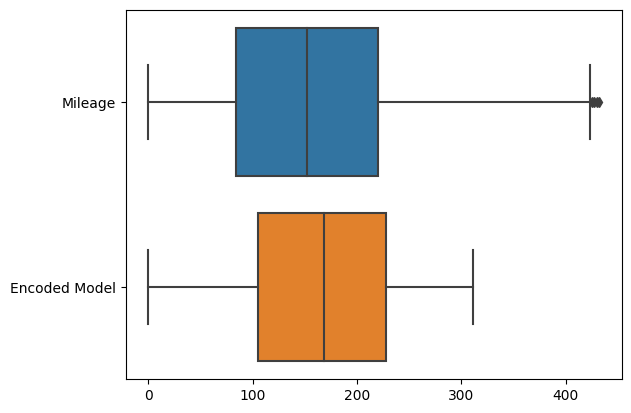

In [141]:
# Redisplay Graphical Univariate EDA using box plot to analyze data distribution after removing outliers
# Remove outliers in EngineV
for x in ["EngineV"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
# Remove outliers in Age
for x in ["Age"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
# Remove outliers in Mileage
for x in ["Mileage"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
sns.boxplot(data=df[['Encoded Brand', 'Encoded Body', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']], orient='h')
plt.show()

sns.boxplot(data=df[['Mileage', 'Encoded Model']], orient = 'h')
plt.show()

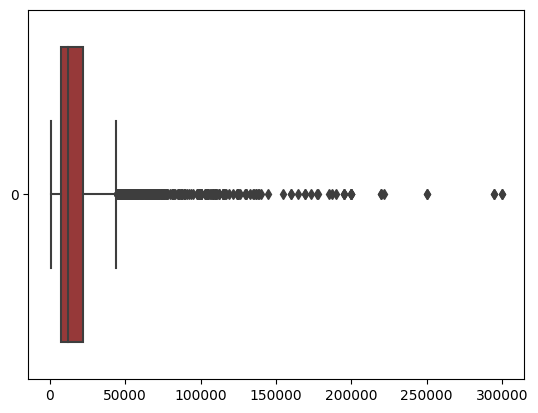

In [148]:
# Display data distribution of Price
sns.boxplot(data=df['Price'], orient='h', color='brown')
plt.show()

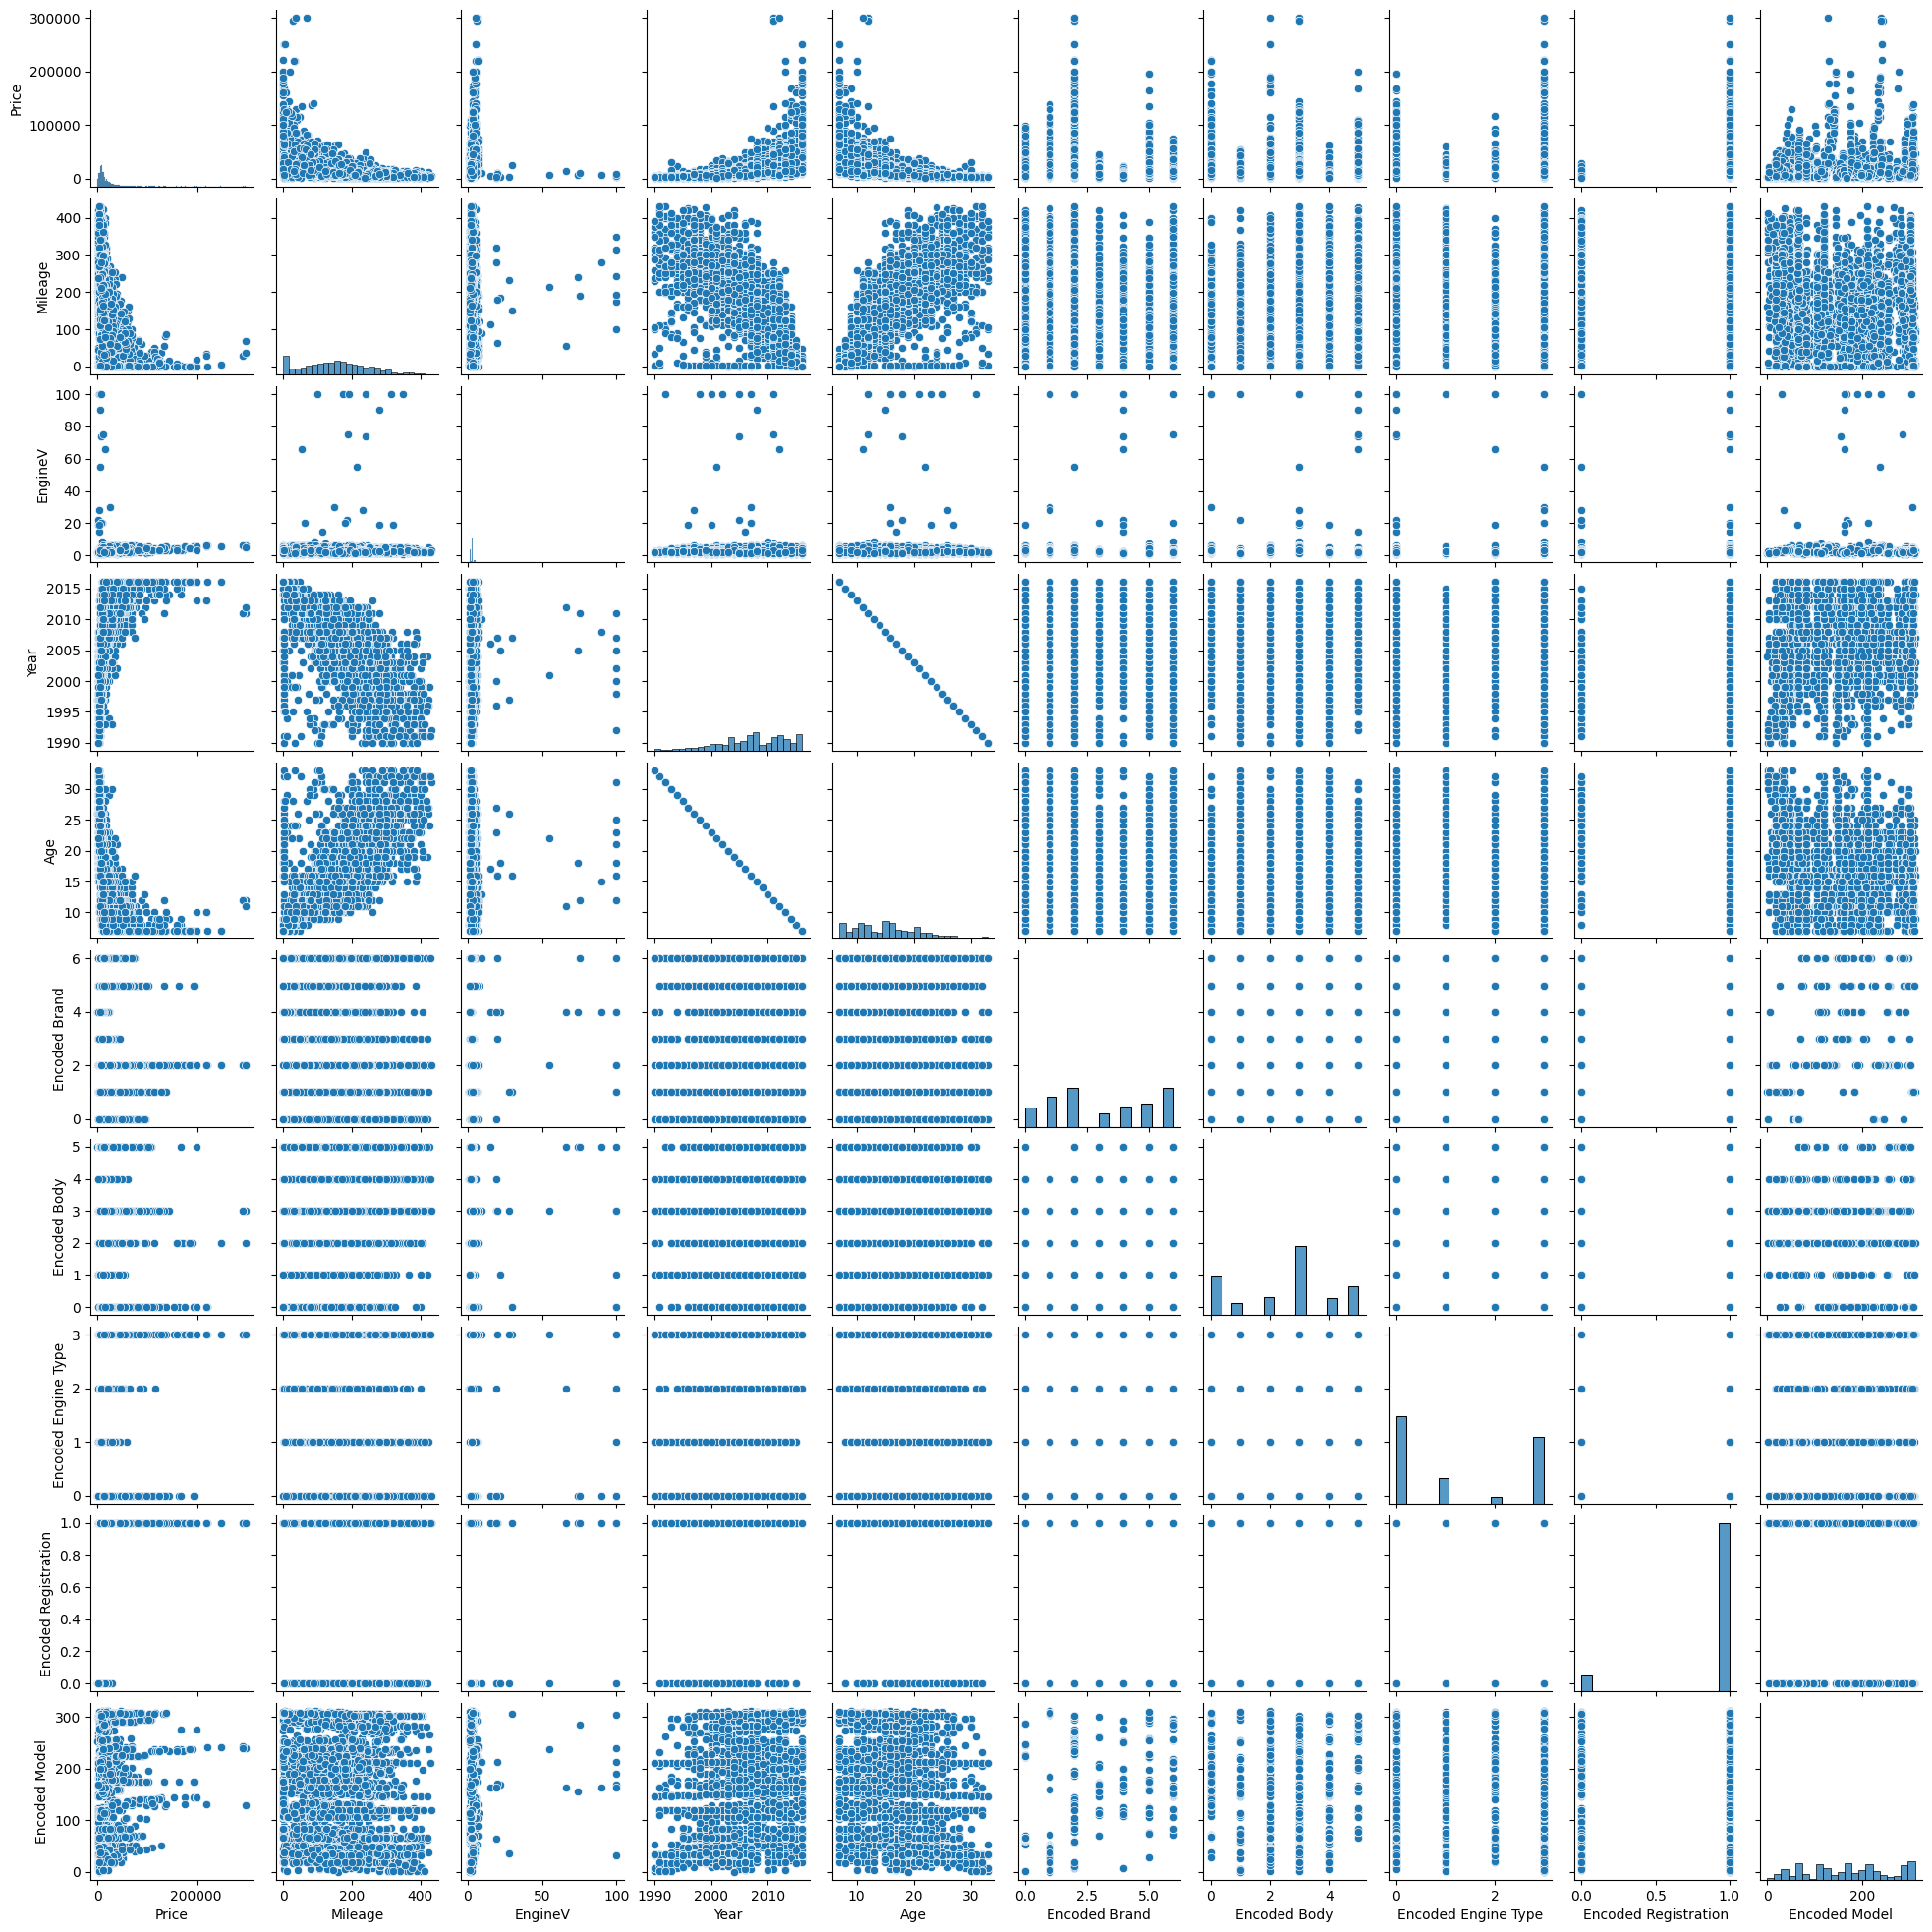

In [149]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=df, height=2)
plt.show()

In [142]:
# Get x and y values
X = df[['Encoded Brand', 'Encoded Body', 'Mileage', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Encoded Model', 'Age']]
y = df['Price']

X.head()

,Encoded Brand,Encoded Body,Mileage,EngineV,Encoded Engine Type,Encoded Registration,Encoded Model,Age
0,1,3,277,2.0,3,1,18,32
1,2,5,427,2.9,0,1,266,24
2,2,3,358,5.0,1,1,237,20
3,0,0,240,4.2,3,1,224,16
4,5,0,120,2.0,3,1,227,12


In [143]:
counter = X.isnull().sum()  + (X == 0).sum()
print(counter)

Encoded Brand            438
Encoded Body             897
Mileage                  185
EngineV                  143
Encoded Engine Type     1968
Encoded Registration     393
Encoded Model              1
Age                        0
dtype: int64


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =   0)